In [1]:
import json

with open('./graph.json', 'r') as fp:
    data = json.load(fp)

In [2]:
data

{'nodes': [{'id': 1, 'name': 'A'},
  {'id': 2, 'name': 'B'},
  {'id': 3, 'name': 'C'},
  {'id': 4, 'name': 'D'},
  {'id': 5, 'name': 'E'},
  {'id': 6, 'name': 'F'},
  {'id': 7, 'name': 'G'},
  {'id': 8, 'name': 'H'},
  {'id': 9, 'name': 'I'},
  {'id': 10, 'name': 'J'}],
 'links': [{'source': 1, 'target': 2},
  {'source': 1, 'target': 5},
  {'source': 1, 'target': 6},
  {'source': 2, 'target': 3},
  {'source': 2, 'target': 7},
  {'source': 3, 'target': 4},
  {'source': 8, 'target': 3},
  {'source': 4, 'target': 5},
  {'source': 4, 'target': 9},
  {'source': 5, 'target': 10}]}

In [3]:
import networkx as nx

g = nx.Graph()

for n in data['nodes']:
    g.add_node(n['id'])
    
for e in data['links']:
    g.add_edge(e['source'], e['target'])

list(g.nodes()), list(g.edges())

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [(1, 2),
  (1, 5),
  (1, 6),
  (2, 3),
  (2, 7),
  (3, 4),
  (3, 8),
  (4, 5),
  (4, 9),
  (5, 10)])

In [4]:
progs = ['dot', 'neato', 'fdp', 'sfdp', 'circo', 'twopi', 'osage', 'patchwork']

g_pos = {
    'spring': nx.spring_layout(g, iterations=200, seed=37),
    'shell': nx.shell_layout(g),
    'spectral': nx.spectral_layout(g),
    'spiral': nx.spiral_layout(g),
    'planar': nx.planar_layout(g),
    'circular': nx.circular_layout(g),
    'kk': nx.kamada_kawai_layout(g)
}
g_pos = {**g_pos, **{k: nx.nx_agraph.graphviz_layout(g, prog=k) for k in progs}}
len(g_pos)

15

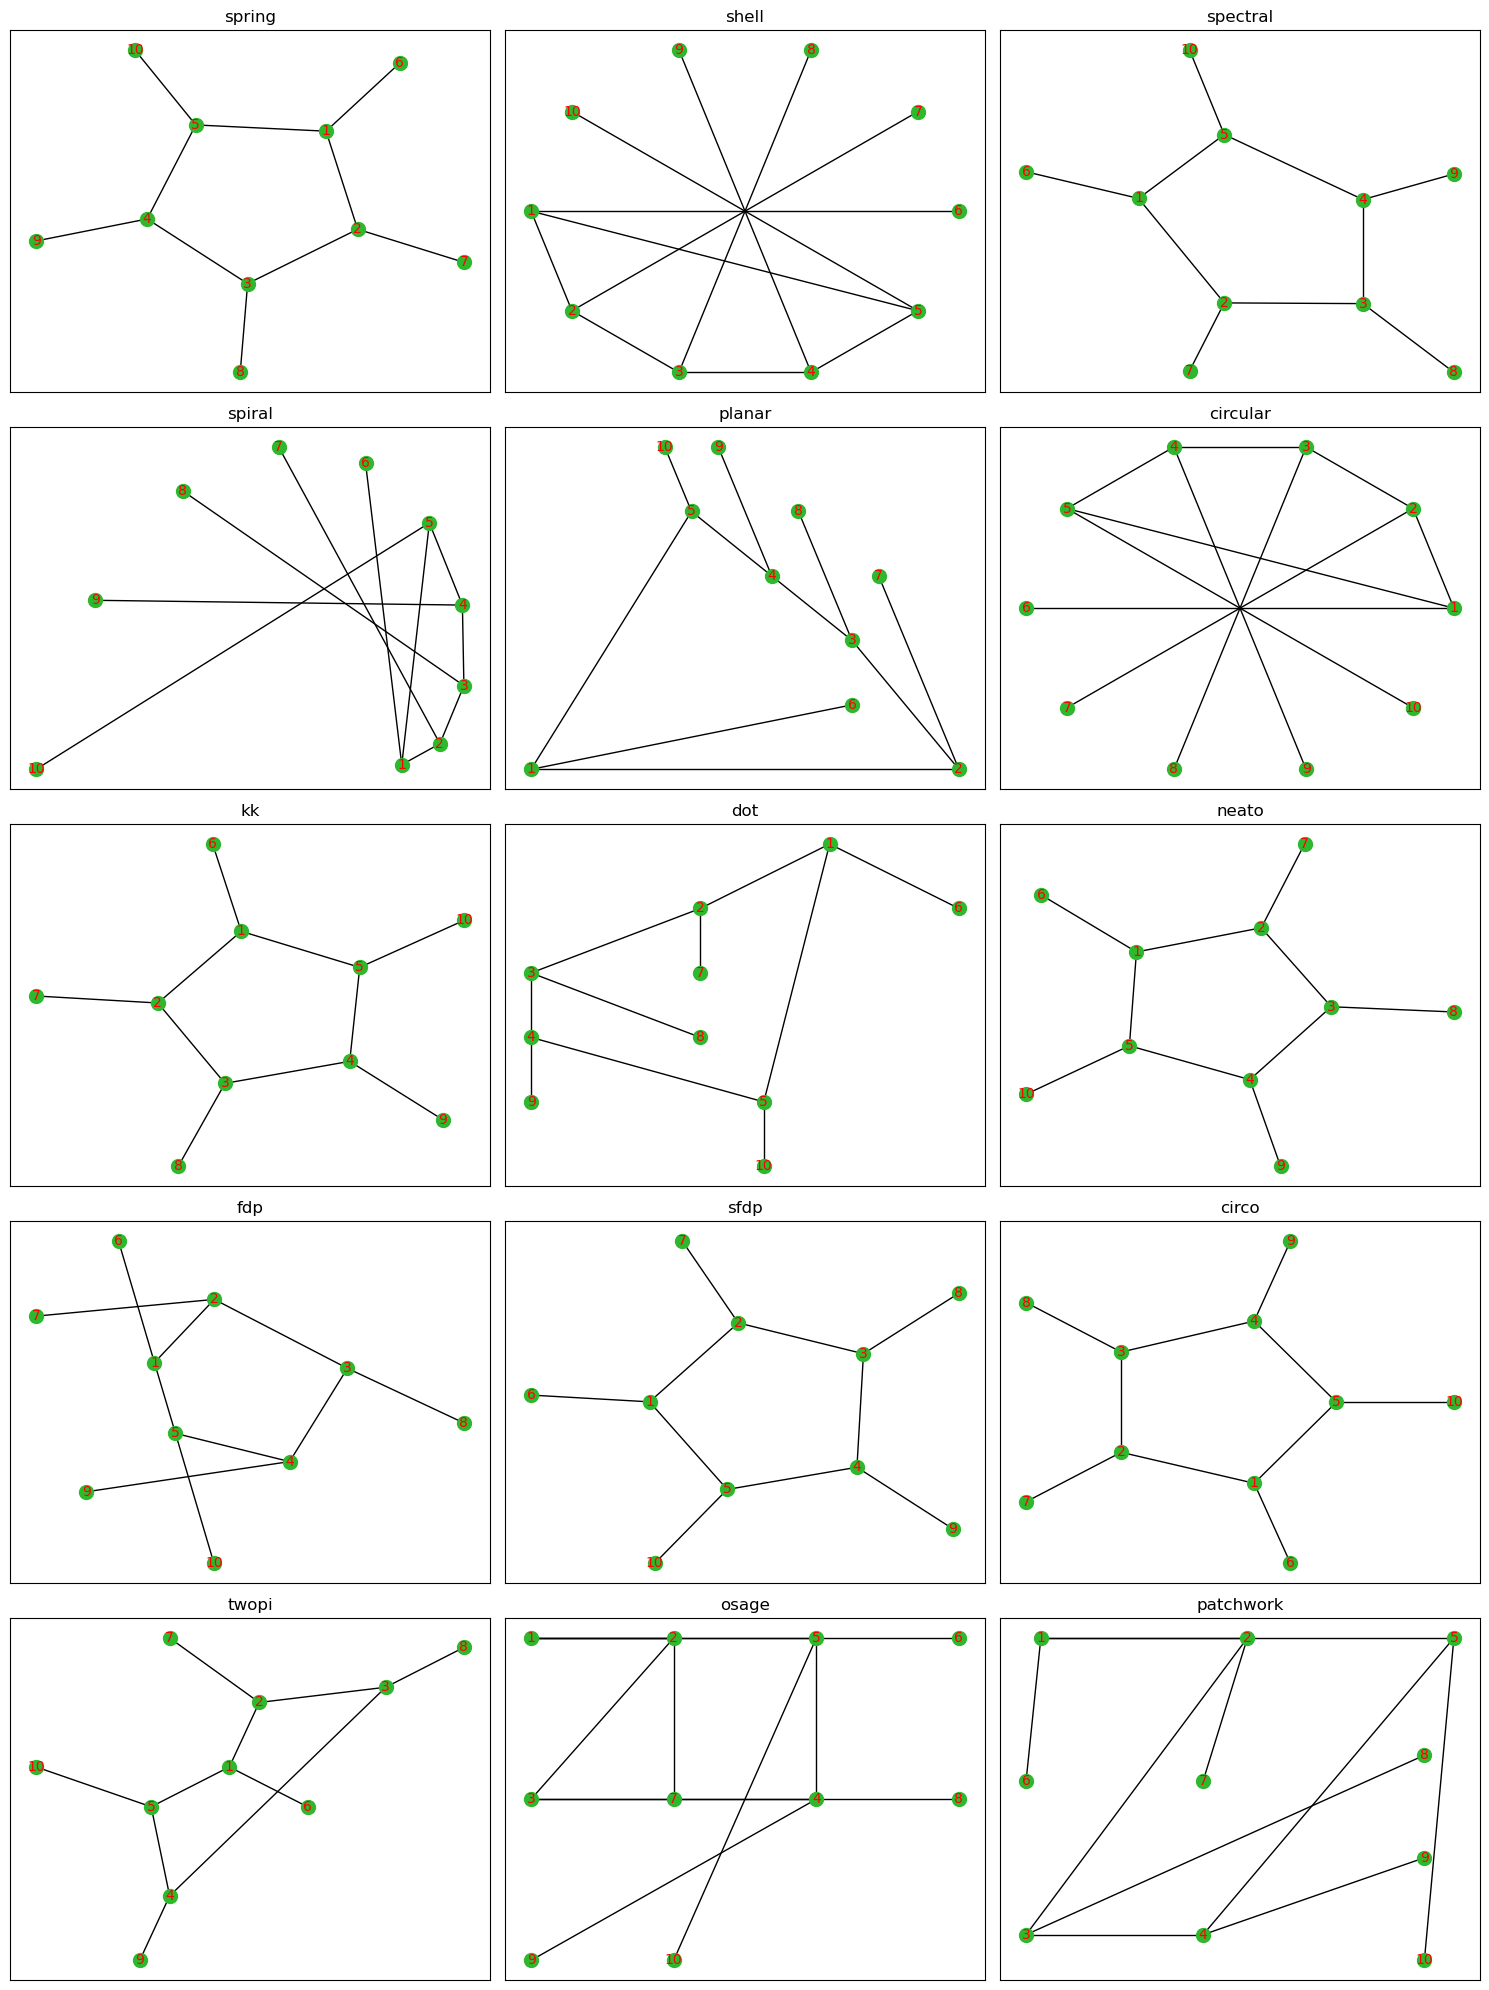

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(5, 3, figsize=(15, 20))

for (k, pos), ax in zip(g_pos.items(), np.ravel(axes)):
    nx.draw_networkx_nodes(
        G=g,
        pos=pos,
        ax=ax,
        node_size=100,
        node_color='#2eb82e',
        alpha=1.0,
        margins=(0.01, 0.01)
    )
    nx.draw_networkx_labels(
        G=g,
        pos=pos,
        font_size=10,
        font_color='r',
        ax=ax
    )
    nx.draw_networkx_edges(
        G=g,
        pos=pos,
        ax=ax,
        alpha=1.0
    )
    
    ax.set_title(k)

fig.tight_layout()

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def scale_pos(layout='planar', x_min=10, x_max=490, y_min=10, y_max=490):
    df = np.array(list((g_pos[layout].values())))
    df = pd.DataFrame(df, columns=['x', 'y'], index=g_pos[layout].keys())
    df = pd.DataFrame({
        'x': MinMaxScaler((x_min, x_max)).fit_transform(df[['x']]).ravel(),
        'y': MinMaxScaler((y_min, y_max)).fit_transform(df[['y']]).ravel()
    }, index=df.index)
    
    pos = {i: {'x': r['x'], 'y': r['y']} for i, r in df.iterrows()}
    return pos

def get_node(d, pos):
    n = {
        'cx': pos[d['id']]['x'], 
        'cy': pos[d['id']]['y']
    }
    return {**d, **n}

def get_link(d, pos):
    n = {
        'x1': pos[d['source']]['x'], 
        'y1': pos[d['source']]['y'], 
        'x2': pos[d['target']]['x'], 
        'y2': pos[d['target']]['y']
    }
    return {**d, **n}

def get_layout(pos):
    return {
        'nodes': [get_node(d, pos) for d in data['nodes']],
        'links': [get_link(d, pos) for d in data['links']]
    }

for layout in g_pos:
    layout_pos = get_layout(scale_pos(layout=layout))
    path = f'./layout/{layout}.json'
    
    print(path)
    
    with open(path, 'w') as fp:
        json.dump(layout_pos, fp)

./layout/spring.json
./layout/shell.json
./layout/spectral.json
./layout/spiral.json
./layout/planar.json
./layout/circular.json
./layout/kk.json
./layout/dot.json
./layout/neato.json
./layout/fdp.json
./layout/sfdp.json
./layout/circo.json
./layout/twopi.json
./layout/osage.json
./layout/patchwork.json
